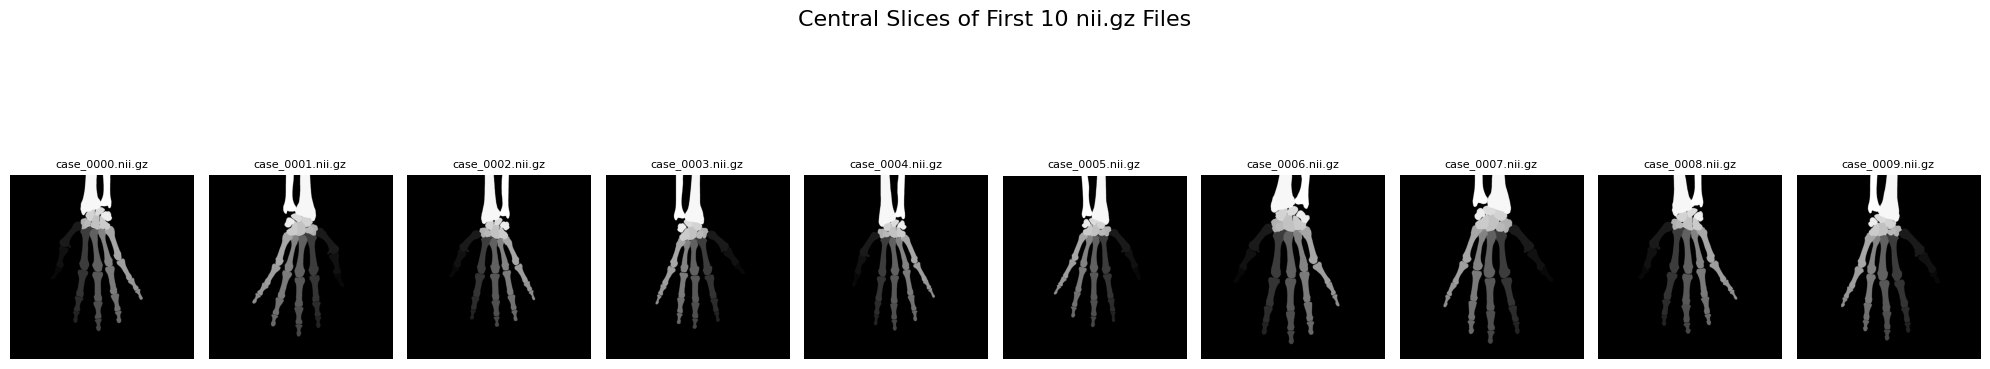

In [15]:
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

# 폴더 경로
folder_path = "/data/ephemeral/home/result/fold1"

# nii.gz 파일 시각화 함수
def visualize_nii_files(folder_path, num_files=10):
    """
    지정된 폴더에서 첫 num_files 개의 nii.gz 파일을 읽어
    중앙 슬라이스를 시각화.
    """
    if not os.path.exists(folder_path):
        print(f"경로가 존재하지 않음: {folder_path}")
        return
    
    # 폴더 내 nii.gz 파일 가져오기
    files = [f for f in os.listdir(folder_path) if f.endswith('.nii.gz')]
    files.sort()  # 정렬
    files = files[:num_files]
    
    if not files:
        print("nii.gz 파일이 폴더에 없습니다.")
        return
    
    # 시각화
    plt.figure(figsize=(20, 5))
    for i, file_name in enumerate(files):
        file_path = os.path.join(folder_path, file_name)
        nii_image = nib.load(file_path)
        image_data = nii_image.get_fdata()
        
        # 중앙 슬라이스 추출
        central_slice = image_data[:, :, image_data.shape[2] // 2]
        
        # 시각화
        plt.subplot(1, len(files), i + 1)
        plt.imshow(central_slice.T, cmap='gray', origin='lower')  # .T로 전치하여 올바르게 표시
        plt.title(file_name, fontsize=8)
        plt.axis('off')
    
    plt.suptitle("Central Slices of First 10 nii.gz Files", fontsize=16)
    plt.tight_layout()
    plt.show()

# 실행
visualize_nii_files(folder_path, num_files=10)


Shape of the data: (2048, 2048, 1)
Data type: float64
Min value: 0.0, Max value: 29.0


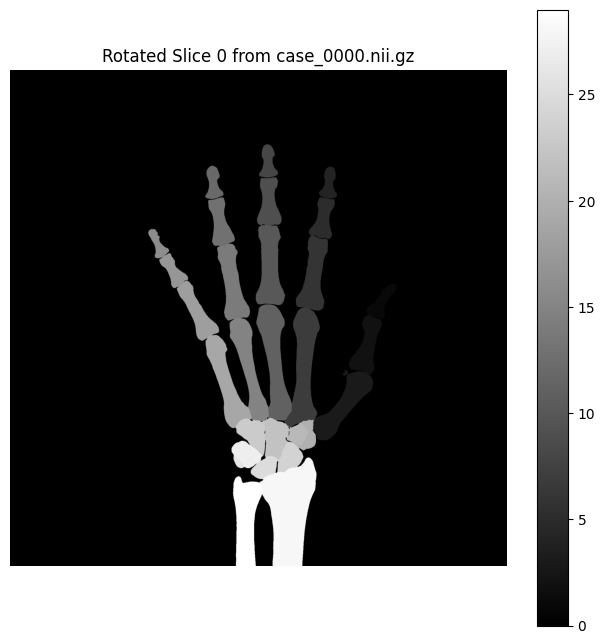

In [2]:
import nibabel as nib
import matplotlib.pyplot as plt
import os

# NIfTI 파일 경로 설정
input_folder = "/data/ephemeral/home/result_combined"  # 예측된 파일이 저장된 폴더
file_name = "case_0000.nii.gz"  # 예제 파일 이름 (파일 이름 확인 후 수정 필요)

# NIfTI 파일 로드
file_path = os.path.join(input_folder, file_name)
img = nib.load(file_path)
data = img.get_fdata()  # Numpy 배열로 변환

# 데이터 정보 출력
print(f"Shape of the data: {data.shape}")
print(f"Data type: {data.dtype}")
print(f"Min value: {data.min()}, Max value: {data.max()}")

# 특정 슬라이스 선택 및 회전
slice_index = data.shape[2] // 2  # Z축의 중간 슬라이스 선택
rotated_slice = np.rot90(data[:, :, slice_index],k=3)  # 90도 회전

# 이미지 시각화
plt.figure(figsize=(8, 8))
plt.imshow(rotated_slice, cmap="gray")
plt.title(f"Rotated Slice {slice_index} from {file_name}")
plt.axis("off")
plt.colorbar()
plt.show()


In [ ]:
import nibabel as nib
import numpy as np
import pandas as pd
import os

# 경로 설정
input_folder = "/data/ephemeral/home/result/fold1"  # 예측된 nii.gz 파일 폴더
output_csv = "/data/ephemeral/home/result/predictions.csv"  # 저장할 CSV 파일 경로

# 클래스 이름 리스트 (순서 유지)
class_names = [
    "finger-1", "finger-2", "finger-3", "finger-4", "finger-5",
    "finger-6", "finger-7", "finger-8", "finger-9", "finger-10",
    "finger-11", "finger-12", "finger-13", "finger-14", "finger-15",
    "finger-16", "finger-17", "finger-18", "finger-19",
    "Trapezium", "Trapezoid", "Capitate", "Hamate",
    "Scaphoid", "Lunate", "Pisiform", "Triquetrum",
    "Radius", "Ulna"
]

# Run-Length Encoding 함수
def rle_encoding(mask):
    """Convert mask to RLE (Run-Length Encoding)."""
    pixels = mask.flatten()
    pixels = np.concatenate([[0], pixels, [0]])  # padding for RLE
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[::2]
    return " ".join(str(x) for x in runs)

# 결과 저장을 위한 리스트
results = []

# nii.gz 파일 리스트 가져오기 및 정렬
file_list = sorted([f for f in os.listdir(input_folder) if f.endswith(".nii.gz")])

# nii.gz 파일 읽기 및 처리
for filename in file_list:  # 정렬된 순서대로 처리
    # NIfTI 파일 읽기
    nii_path = os.path.join(input_folder, filename)
    img = nib.load(nii_path)
    data = img.get_fdata()

    # 각 클래스에 대해 RLE 생성
    for idx, class_name in enumerate(class_names, start=1):
        mask = (data == idx).astype(np.uint8)  # 클래스별 마스크
        if np.any(mask):  # 예측값이 존재하면 RLE 생성
            rle = rle_encoding(mask)
        else:  # 예측값이 없으면 빈 RLE 생성
            rle = ""

        # 결과 추가
        results.append({
            "image_name": filename,  # 파일 이름에서 확장자 제거
            "class": class_name,
            "rle": rle
        })

# DataFrame 생성 및 저장
df = pd.DataFrame(results)
df.to_csv(output_csv, index=False)
print(f"Predictions saved to {output_csv}")


Predictions saved to /data/ephemeral/home/result/predictions1.csv


In [ ]:
import nibabel as nib
import numpy as np
import pandas as pd
import os

# 경로 설정
input_folder = "/data/ephemeral/home/result/fold1"  # 예측된 nii.gz 파일 폴더
output_csv = "/data/ephemeral/home/result/rotated_predictions.csv"  # 저장할 CSV 파일 경로

# 클래스 이름 리스트 (순서 유지)
class_names = [
    "finger-1", "finger-2", "finger-3", "finger-4", "finger-5",
    "finger-6", "finger-7", "finger-8", "finger-9", "finger-10",
    "finger-11", "finger-12", "finger-13", "finger-14", "finger-15",
    "finger-16", "finger-17", "finger-18", "finger-19",
    "Trapezium", "Trapezoid", "Capitate", "Hamate",
    "Scaphoid", "Lunate", "Triquetrum", "Pisiform", 
    "Radius", "Ulna"
]

# Run-Length Encoding 함수
def rle_encoding(mask):
    """Convert mask to RLE (Run-Length Encoding)."""
    pixels = mask.flatten()
    pixels = np.concatenate([[0], pixels, [0]])  # padding for RLE
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[::2]
    return " ".join(str(x) for x in runs)

# 결과 저장을 위한 리스트
results = []

# nii.gz 파일 리스트 가져오기 및 정렬
file_list = sorted([f for f in os.listdir(input_folder) if f.endswith(".nii.gz")])

# nii.gz 파일 읽기 및 처리
for filename in file_list:  # 정렬된 순서대로 처리
    # NIfTI 파일 읽기
    nii_path = os.path.join(input_folder, filename)
    img = nib.load(nii_path)
    data = img.get_fdata()

    # 270도 회전
    rotated_data = np.rot90(data, k=3, axes=(0, 1))  # 270도 회전 (axes=(0, 1))

    # 각 클래스에 대해 RLE 생성
    for idx, class_name in enumerate(class_names, start=1):
        mask = (rotated_data == idx).astype(np.uint8)  # 클래스별 마스크
        if np.any(mask):  # 예측값이 존재하면 RLE 생성
            rle = rle_encoding(mask)
        else:  # 예측값이 없으면 빈 RLE 생성
            rle = ""

        # 결과 추가
        results.append({
            "image_name": filename.replace(".nii.gz", ""),  # 파일 이름에서 확장자 제거
            "class": class_name,
            "rle": rle
        })

# DataFrame 생성 및 저장
df = pd.DataFrame(results)
df.to_csv(output_csv, index=False)
print(f"Rotated predictions saved to {output_csv}")


Rotated predictions saved to /data/ephemeral/home/result/rotated_predictions.csv


In [2]:
import nibabel as nib
import numpy as np
import pandas as pd
import os

# 경로 설정
input_folder = "/data/ephemeral/home/result"  # 예측된 nii.gz 파일 폴더
output_csv = "/data/ephemeral/home/nnunet_sigmoid.csv"  # 저장할 CSV 파일 경로

# 클래스 이름 리스트 (순서 유지)
class_names = [
    "finger-1", "finger-2", "finger-3", "finger-4", "finger-5",
    "finger-6", "finger-7", "finger-8", "finger-9", "finger-10",
    "finger-11", "finger-12", "finger-13", "finger-14", "finger-15",
    "finger-16", "finger-17", "finger-18", "finger-19",
    "Trapezium", "Trapezoid", "Capitate", "Hamate",
    "Scaphoid", "Lunate", "Triquetrum", "Pisiform",
    "Radius", "Ulna"
]

# Run-Length Encoding 함수
def rle_encoding(mask):
    """Convert mask to RLE (Run-Length Encoding)."""
    pixels = mask.flatten()
    pixels = np.concatenate([[0], pixels, [0]])  # padding for RLE
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[::2]
    return " ".join(str(x) for x in runs)

# 결과 저장을 위한 리스트
results = []

# nii.gz 파일 리스트 가져오기 및 정렬
file_list = sorted([f for f in os.listdir(input_folder) if f.endswith(".nii.gz")])

# nii.gz 파일 읽기 및 처리
for filename in file_list:  # 정렬된 순서대로 처리
    print(f"Processing file: {filename}")
    
    # NIfTI 파일 읽기
    nii_path = os.path.join(input_folder, filename)
    img = nib.load(nii_path)
    data = img.get_fdata()

    # 270도 회전
    rotated_data = np.rot90(data, k=3, axes=(0, 1))  # 270도 회전 (axes=(0, 1))

    # 수평 뒤집기
    flipped_data = np.flip(rotated_data, axis=1)  # 좌우 뒤집기 (axis=1)

    # 각 클래스에 대해 RLE 생성
    for idx, class_name in enumerate(class_names, start=1):
        mask = (flipped_data == idx).astype(np.uint8)  # 클래스별 마스크
        if np.any(mask):  # 예측값이 존재하면 RLE 생성
            rle = rle_encoding(mask)
        else:  # 예측값이 없으면 빈 RLE 생성
            rle = ""

        # 결과 추가
        results.append({
            "image_name": filename.replace(".nii.gz", ""),  # 파일 이름에서 확장자 제거
            "class": class_name,
            "rle": rle
        })

# DataFrame 생성 및 저장
df = pd.DataFrame(results)
df.to_csv(output_csv, index=False)
print(f"Rotated and flipped predictions saved to {output_csv}")


Processing file: case_0000.nii.gz
Processing file: case_0001.nii.gz
Processing file: case_0002.nii.gz
Processing file: case_0003.nii.gz
Processing file: case_0004.nii.gz
Processing file: case_0005.nii.gz
Processing file: case_0006.nii.gz
Processing file: case_0007.nii.gz
Processing file: case_0008.nii.gz
Processing file: case_0009.nii.gz
Processing file: case_0010.nii.gz
Processing file: case_0011.nii.gz
Processing file: case_0012.nii.gz
Processing file: case_0013.nii.gz
Processing file: case_0014.nii.gz
Processing file: case_0015.nii.gz
Processing file: case_0016.nii.gz
Processing file: case_0017.nii.gz
Processing file: case_0018.nii.gz
Processing file: case_0019.nii.gz
Processing file: case_0020.nii.gz
Processing file: case_0021.nii.gz
Processing file: case_0022.nii.gz
Processing file: case_0023.nii.gz
Processing file: case_0024.nii.gz
Processing file: case_0025.nii.gz
Processing file: case_0026.nii.gz
Processing file: case_0027.nii.gz
Processing file: case_0028.nii.gz
Processing fil